# EIT-CEM Forward Problem

In [1]:
from EIT_CEM_app import *
%matplotlib inline

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [2]:
"Basic Definitions"
r=1            #Circle radius
L=16           #Number of Electrodes
per_cober=0.5  #Percentage of area covered by electrodes
rotate=0       #Rotation

#Return object with angular position of each electrode
ele_pos=electrodes_position(L, per_cober, rotate)

In [3]:
refine_n=8 #Refinement mesh
n_in=8     #Vertex on elec.
n_out=2    #Vertex on gaps (Sometimes it is important.)

mesh_inverse=MyMesh(r, refine_n, n_in, n_out, ele_pos)
mesh_forward=MyMesh(r, refine_n*3, n_in*3, n_out*3, ele_pos)


#### Malhas

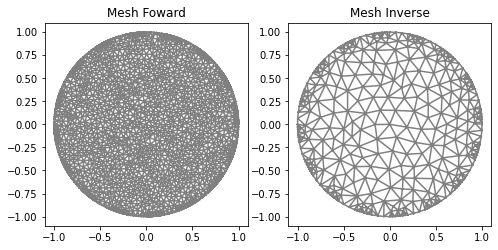

In [4]:
plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plot(mesh_forward, title="Mesh Forward");
plt.subplot(1,2,2)
plot(mesh_inverse, title="Mesh Inverse");
#print("Number of elements: ", mesh_inverse.num_cells())
#print("Number of elements: ", mesh_forward.num_cells())

## Problema Direto

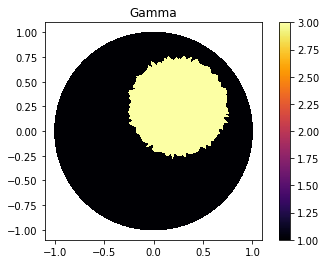

In [5]:
"Solution Forward problem"
#GammaCircle returns a vector that is a map between elements and their cell values.
ValuesCells0=GammaCircle(mesh_forward,3.0,1.0,0.50, 0.25, 0.25); #mesh, cond_in, cond_out, radius, certerx, cerntery
gamma0=CellFunction(mesh_forward, values=ValuesCells0);          #Transform vector to function


"Plot"
V_DG=FiniteElement('DG',mesh_forward.ufl_cell(),0)
gamma_direct=plot_figure(mesh_forward, V_DG, gamma0, name="Gamma");

### Forward Problem

In [6]:
"Forward Problem"
#Definições básicas
z=np.ones(L)*0.025                              #Impedance of each electrode
l=L-1                                           #Numero of experiments
I_all=current_method( L ,l, method=2)           #Current
VD=FiniteElement('CG',mesh_forward.ufl_cell(),1) #Solution Space Continous Galerkin

In [7]:
print(np.array(I_all))

[[ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. 

In [8]:
#Solver
ForwardObject=ForwardProblem(mesh_forward,  ele_pos,  z)
list_u0, list_U0 = ForwardObject.solve_forward(VD, gamma0, I_all, l)
list_U0 = ForwardObject.sol_asarray()

In [9]:
print(list_U0[0:L])

[ 0.74659668 -0.69037383 -0.11527343 -0.06251943 -0.04542257 -0.03537776
 -0.02792534 -0.02158871 -0.01562908 -0.00952088 -0.00273239  0.00552806
  0.01674227  0.0342237   0.0673924   0.15588032]


In [10]:
#Noise add
noise_level=0.01
noise_type='uniform'
list_U0_noised=fn_addnoise(list_U0, noise_level, noise_type, seed=42)
print(list_U0_noised[0:L])

[ 0.74802052 -0.69077016 -0.11341683 -0.05815365 -0.04609377 -0.03604891
 -0.02339852 -0.01938885 -0.01697484 -0.00796562 -0.00406078  0.00419304
  0.01743586  0.02873927  0.0624479   0.15426851]


### Plot u

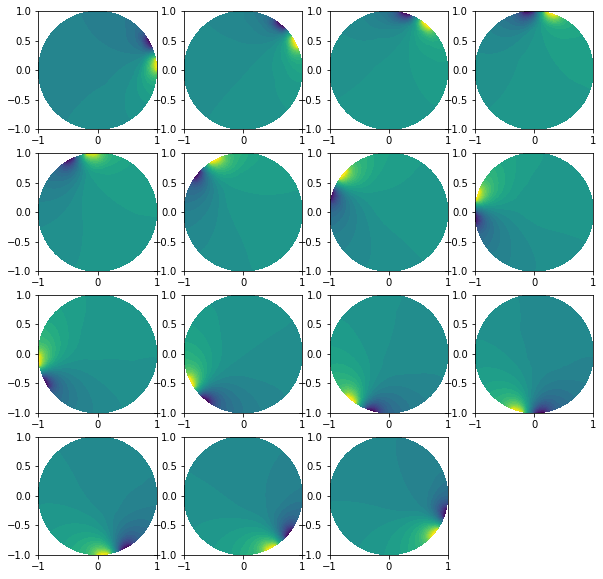

In [11]:
plt.figure(figsize=(10, 10))
for i in range(0, l):
    plt.subplot(4,4,i+1)
    plot(list_u0[i])


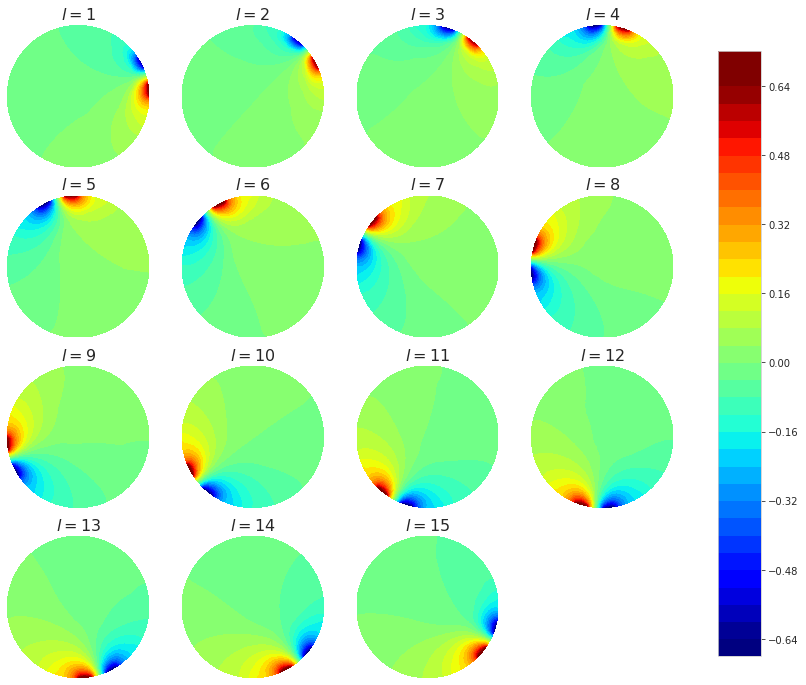

In [12]:
import seaborn as sns #We will use seaborn here
sns.set_style("whitegrid")

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12, 12))
just_it=range(0,L-1)
j=0
for i in range(0, l):
    if i in just_it:
        plt.subplot(4,4,j+1)
        p=plot(list_u0[i])
        p.set_cmap('jet')    
        p.set_clim(-0.65, 0.65)
        plt.xticks([])
        plt.yticks([])
        plt.title(r"$l=$"+str(i+1), fontsize=16)
        j+=1
        plt.box(False)
        
cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
fig.colorbar(p, cax=cbar_ax)


#fig.savefig('potential', dpi=300, bbox_inches='tight', transparent=True)


### Solver

### Plot Noise

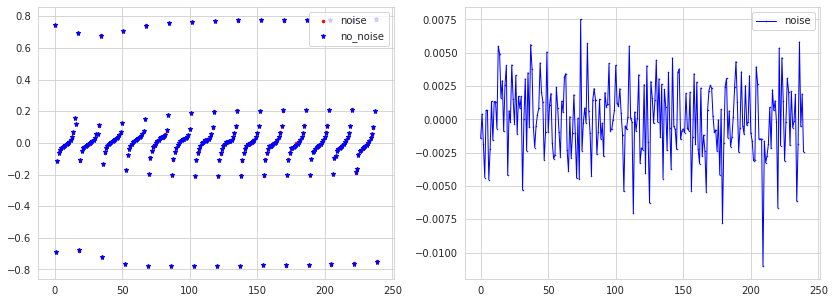

In [13]:
if noise_level>1E-5:
    vec_U0_noise=list_U0_noised#[0:L]
    vec_U0=list_U0#[0:L]
    x=range(len(vec_U0_noise))

    plt.figure(figsize=(14, 5),)
    plt.subplot(1,2,1)
    plt.plot(x, vec_U0_noise, linewidth=0,  marker='.', markersize=5, label="noise", color='red');
    plt.plot(x, vec_U0, linewidth=0,  marker='*', markersize=5, label="no_noise", color="blue");
    plt.legend()
   
    plt.subplot(1,2,2)
    plt.plot(x, vec_U0-vec_U0_noise, linewidth=1,  marker='.', markersize=1, label="noise", color="blue");
    plt.legend()
    
    
plt.savefig('noise', dpi=300, bbox_inches='tight', transparent=True)

### Solver parameters

In [14]:
"Object"
InverseObject=InverseProblem(mesh_inverse, ele_pos, list_U0_noised, I_all, l, z)

"Solver Parameters"
InverseObject.set_solverconfig(step_limit=100)
#InverseObject.set_NewtonParameters(mu_i=0.80, mumax=0.999, nu=0.99, R=1)
#InverseObject.set_InnerParameters(inner_method='Landweber', land_a=20)
#InverseObject.set_InnerParameters(inner_method='ME', ME_reg=5E-3)
#InverseObject.set_InnerParameters(inner_method='CG')
#InverseObject.set_InnerParameters(inner_method='LM', LM_c0=0.95, LM_q=0.05)
#InverseObject.set_InnerParameters(inner_method='Tikhonov', Tik_c0=0.95, Tik_q=0.05)

"Noise Parameters"
tau=1.2
InverseObject.set_NoiseParameters(tau=tau, noise_level=0.01)
print(f"Discrepance stop {tau*noise_level*100}% residue")

"Noise Parameters"
#InverseObject.set_answer(gamma0, mesh_forward)
#InverseObject.weight_value=False
#MyCellsgamma_k=np.ones(mesh_inverse.num_cells())*2.0
#InverseObject.set_firstguess(MyCellsgamma_k)

Discrepance stop 1.2% residue


'Noise Parameters'

In [15]:
#Solver
InverseObject.solve_inverse()


Residue (%)= 14.082986300269976  step: 0 Inner step:  0
mu_n 0.9
Residue (%)= 12.157299939196832  step: 1 Inner step:  23
mu_n 0.9
Residue (%)= 10.40129239516299  step: 2 Inner step:  31
mu_n 0.9248806451612903
Residue (%)= 9.225298832644445  step: 3 Inner step:  30
mu_n 0.92145429
Residue (%)= 8.12955094871466  step: 4 Inner step:  38
mu_n 0.9113275073529
Residue (%)= 7.038075475434578  step: 5 Inner step:  53
mu_n 0.9354870723420904
Residue (%)= 6.340323229699763  step: 6 Inner step:  48
mu_n 0.9278382087353471
Residue (%)= 5.6488341993828435  step: 7 Inner step:  64
mu_n 0.9176412668213456
Residue (%)= 4.962373963392449  step: 8 Inner step:  90
mu_n 0.9404923559498839
Residue (%)= 4.5273476315607555  step: 9 Inner step:  82
mu_n 0.9337520454079763
Residue (%)= 4.099250125589407  step: 10 Inner step:  110
mu_n 0.9234901104289427
Residue (%)= 3.663615761460644  step: 11 Inner step:  161
mu_n 0.9467784362424627
Residue (%)= 3.396497431169655  step: 12 Inner step:  143
mu_n 0.9391391392

### Plot gamma_k

In [16]:
"Getting the result"
gamma_k=InverseObject.gamma_k
list_U=InverseObject.list_U

"Getting data_summary"
innerstep_vec=InverseObject.innerstep_vec
res_vec=InverseObject.res_vec
mun_vec=InverseObject.mun_vec
error_vec=InverseObject.error_vec

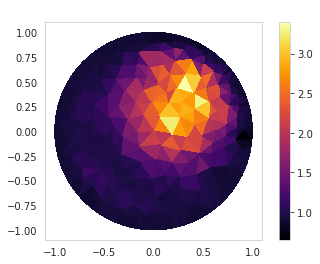

In [17]:
"Plot result"
gamma_k=InverseObject.gamma_k
V_DG=FiniteElement('DG',mesh_inverse.ufl_cell(),0)
gamma_k=plot_figure(mesh_inverse, V_DG, gamma_k, name=" ");

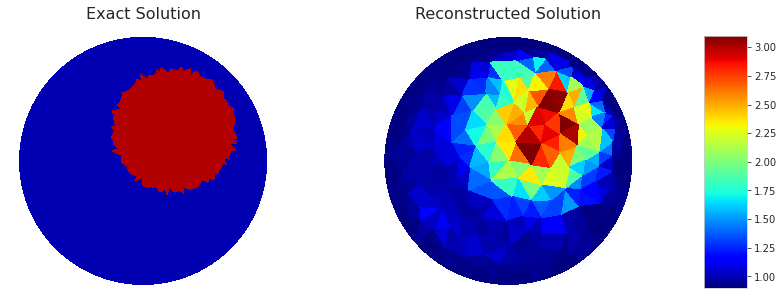

In [18]:
gamma_list=[gamma_direct, gamma_k]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for i in range(0, len(gamma_list)):
    plt.subplot(1,2,i+1)
    p=plot(gamma_list[i])
    p.set_cmap('jet')    
    p.set_clim(0.90, 3.1)
    plt.xticks([])
    plt.yticks([])
    if i==0: plt.title("Exact Solution", fontsize=16)
    if i==1: plt.title("Reconstructed Solution", fontsize=16)
    j+=1
    plt.box(False)
        
cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
fig.colorbar(p, cax=cbar_ax)

#fig.savefig('gamma_ans', dpi=300, bbox_inches='tight', transparent=True)